# Final Project



In [1]:
#'''
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install nltk --quiet
!pip install wordcloud --quiet
!pip install TextBlob --quiet
!pip install flair --quiet
#'''

## Import libraries

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
# vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
# textblob
from textblob import TextBlob
# flair
import flair

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/gitpod/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/gitpod/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# import functions to use (defined in utils.py)
import utils

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/gitpod/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Import data as pandas dataframes

In [4]:
df_raw_p= pd.read_csv('../data/raw/Putin_Tweets.csv')
df_raw_p.head()

UserScreenName          UserName                 Timestamp  \
0  Free Syrian Memes  @FreeSyrianMemes  2022-01-01T22:26:19.000Z   
1              ciciu       @_ciciulena  2022-01-01T20:42:30.000Z   
2                TOM  @lonestarmoocher  2022-01-01T19:12:05.000Z   
3         Tom London       @TomLondon6  2022-01-01T22:39:56.000Z   
4           Ukemonde         @ukemonde  2022-01-01T22:02:54.000Z   

                                            Text  \
0  Free Syrian Memes\n@FreeSyrianMemes\n·\nJan 1   
1                   ciciu\n@_ciciulena\n·\nJan 1   
2                TOM\n@lonestarmoocher\n·\nJan 1   
3              Tom London\n@TomLondon6\n·\nJan 1   
4                  Ukemonde\n@ukemonde\n·\nJan 1   

                                                                                                                                                                                                                                                                        Embedded_text  \
0                                                                                                                Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35   
1                                                                                                                                                                                                                                                 PUTIN?????????? #CIAO2021\n1\n2\n38   
2                                                                                                                                                                                                                              Looks like Lumpy had a meeting with Putin.\n10\n10\n56   
3                                                        What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813   
4  Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16   

  Emojis Comments Likes Retweets  \
0      0        0     3       35   
1      0        1     2       38   
2      0       10    10       56   
3      0        9   218      813   
4      0        0     7       16   

                                                                                                                                              Image link  \
0                                                                                  ['https://pbs.twimg.com/media/FIDMAkeXsAcBOwG?format=jpg&name=small']   
1                                                                                                                                                     []   
2                                                                                  ['https://pbs.twimg.com/media/FICgVy4VgAMHEqH?format=jpg&name=small']   
3                                                                                                                                                     []   
4  ['https://pbs.twimg.com/media/FIDHb0SXMAcqHoh?format=jpg&name=small', 'https://pbs.twimg.com/profile_images/1513598405662187527/37NBzG-n_normal.jpg']   

                                                        Tweet URL  
0  https://twitter.com/FreeSyrianMemes/status/1477405855578570761  
1       https://twitter.com/_ciciulena/status/1477379730525536263  
2  https://twitter.com/lonestarmoocher/status/1477356976250126336  
3       https://twitter.com/TomLondon6/status/1477409281993494531  
4         https://twitter.com/ukemonde/status/1477399960547172353

In [5]:
df_raw_z= pd.read_csv('../data/raw/Zelensky_Tweets.csv')
df_raw_z.head()

UserScreenName          UserName                 Timestamp  \
0   HillReporter.com     @HillReporter  2022-01-01T00:22:02.000Z   
1  Stars and Stripes  @starsandstripes  2022-01-01T06:18:00.000Z   
2          Jamie Fly        @jamiemfly  2022-01-01T14:58:22.000Z   
3  Ivan Katchanovski   @I_Katchanovski  2022-01-01T19:26:23.000Z   
4  M. K. Bhadrakumar  @BhadraPunchline  2022-01-01T17:53:48.000Z   

                                            Text  \
0      HillReporter.com\n@HillReporter\n·\nJan 1   
1  Stars and Stripes\n@starsandstripes\n·\nJan 1   
2                Jamie Fly\n@jamiemfly\n·\nJan 1   
3   Ivan Katchanovski\n@I_Katchanovski\n·\nJan 1   
4  M. K. Bhadrakumar\n@BhadraPunchline\n·\nJan 1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Embedded_text  \
0                                                                                                             President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701   
1  Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29   
2                                  Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31   
3                                                                                               #Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21   
4                      Zelensky: "No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Ru

In [6]:
df_raw_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10737 entries, 0 to 10736
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  10717 non-null  object
 1   UserName        10737 non-null  object
 2   Timestamp       10737 non-null  object
 3   Text            10737 non-null  object
 4   Embedded_text   10737 non-null  object
 5   Emojis          10737 non-null  object
 6   Comments        10737 non-null  object
 7   Likes           10737 non-null  object
 8   Retweets        10737 non-null  object
 9   Image link      10737 non-null  object
 10  Tweet URL       10737 non-null  object
dtypes: object(11)
memory usage: 922.8+ KB


In [7]:
df_raw_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  11151 non-null  object
 1   UserName        11170 non-null  object
 2   Timestamp       11170 non-null  object
 3   Text            11170 non-null  object
 4   Embedded_text   11170 non-null  object
 5   Emojis          11170 non-null  object
 6   Comments        11170 non-null  object
 7   Likes           11170 non-null  object
 8   Retweets        11170 non-null  object
 9   Image link      11170 non-null  object
 10  Tweet URL       11170 non-null  object
dtypes: object(11)
memory usage: 960.0+ KB


## Preprocess dataframes

Apply functions defined in utils.py to each dataframe

In [8]:
df_interim_p = utils.preprocess(df_raw_p)
df_interim_p.head()

Timestamp          UserName  Comments  Likes  Retweets Is_response  \
0  2022-01-01  @FreeSyrianMemes         0      3        35           0   
1  2022-01-01       @_ciciulena         1      2        38           0   
2  2022-01-01  @lonestarmoocher        10     10        56           0   
3  2022-01-01       @TomLondon6         9    218       813           0   
4  2022-01-01         @ukemonde         0      7        16           0   

  Quote_another  \
0             0   
1             0   
2             0   
3             0   
4             1   

                                                                                                                                                                                                                                                                                Tweet  \
0                                                                                                                Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35   
1                                                                                                                                                                                                                                                 PUTIN?????????? #CIAO2021\n1\n2\n38   
2                                                                                                                                                                                                                              Looks like Lumpy had a meeting with Putin.\n10\n10\n56   
3                                                        What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813   
4  Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16   

                                                                                                                                             Clean_Tweet  
0                                 halt russian aggression day ship atgms syrian rebel ukraine poland finland anyone else want send wire guide fuck putin  
1                                                                                                                                             putin ciao  
2                                                                                                                             look like lumpy meet putin  
3  kind country honour war criminals like blair imprison man publish evidence war crimes like assange putin russia xi china repressive tinpot country uk  
4                                                                                                                                    time putin tribunal

In [9]:
df_interim_z = utils.preprocess(df_raw_z)
df_interim_z.head()

Timestamp          UserName  Comments  Likes  Retweets Is_response  \
0  2022-01-01     @HillReporter        13    148       701           0   
1  2022-01-01  @starsandstripes         6      9        29           0   
2  2022-01-01        @jamiemfly         0      9        31           0   
3  2022-01-01   @I_Katchanovski         1      9        21           0   
4  2022-01-01  @BhadraPunchline         4      4         7           0   

  Quote_another  \
0             0   
1             0   
2             0   
3             0   
4             0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Tweet  \
0                                                                                                             President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701   
1  Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29   
2                                  Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31   
3                                                                                               #Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21   
4                      Zelensky: "No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n4\n4\n7   

                                                                                         

In [10]:
# compare de size of each data frame (row and interim)
print(df_raw_p.shape)
print(df_interim_p.shape)
print(df_raw_z.shape)
print(df_interim_z.shape)

(10737, 11)
(10736, 9)
(11170, 11)
(11151, 9)


There are less rows in the interim dataframes because after preprocessing some tweets are empty

In [11]:
df_interim_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10736 entries, 0 to 10736
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Timestamp      10736 non-null  object  
 1   UserName       10736 non-null  object  
 2   Comments       10736 non-null  int64   
 3   Likes          10736 non-null  int64   
 4   Retweets       10736 non-null  int64   
 5   Is_response    10736 non-null  category
 6   Quote_another  10736 non-null  category
 7   Tweet          10736 non-null  object  
 8   Clean_Tweet    10736 non-null  object  
dtypes: category(2), int64(3), object(4)
memory usage: 692.2+ KB


In [12]:
df_interim_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11151 entries, 0 to 11169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Timestamp      11151 non-null  object  
 1   UserName       11151 non-null  object  
 2   Comments       11151 non-null  int64   
 3   Likes          11151 non-null  int64   
 4   Retweets       11151 non-null  int64   
 5   Is_response    11151 non-null  category
 6   Quote_another  11151 non-null  category
 7   Tweet          11151 non-null  object  
 8   Clean_Tweet    11151 non-null  object  
dtypes: category(2), int64(3), object(4)
memory usage: 719.0+ KB


In [13]:
df_interim_p.describe()

Comments         Likes      Retweets
count  10736.000000  10736.000000  10736.000000
mean      13.566319     54.285022    231.723268
std      112.529875    400.060235   1734.828079
min        0.000000      0.000000      0.000000
25%        0.000000      1.000000      7.000000
50%        1.000000      3.000000     16.000000
75%        4.000000     12.000000     47.000000
max     5356.000000  16400.000000  66100.000000

In [14]:
# highest quintile threshold for each numeric variable
df_interim_p.quantile(q = 0.8)

Comments     6.0
Likes       19.0
Retweets    70.0
Name: 0.8, dtype: float64

In [15]:
df_interim_z.describe()

Comments          Likes       Retweets
count  11151.000000   11151.000000   11151.000000
mean      12.333513      65.739665     331.168057
std      103.885582    1055.900826    6190.075492
min        0.000000       0.000000       0.000000
25%        0.000000       0.000000       2.000000
50%        1.000000       1.000000       5.000000
75%        2.000000       6.000000      28.000000
max     4698.000000  103900.000000  620000.000000

In [16]:
# highest quintile threshold for each numeric variable
df_interim_z.quantile(q = 0.8)

Comments     3.0
Likes       11.0
Retweets    44.0
Name: 0.8, dtype: float64

In [17]:
df_interim_p.describe(include = 'category')

Is_response  Quote_another
count         10736          10736
unique            2              2
top               0              0
freq           6812           9124

In [18]:
df_interim_p['Is_response'].value_counts(normalize = True)

0    0.634501
1    0.365499
Name: Is_response, dtype: float64

In [19]:
df_interim_p['Quote_another'].value_counts(normalize = True)

0    0.849851
1    0.150149
Name: Quote_another, dtype: float64

In [20]:
df_interim_z.describe(include = 'category')

Is_response  Quote_another
count         11151          11151
unique            2              2
top               1              0
freq           6347          10178

In [21]:
df_interim_z['Is_response'].value_counts(normalize = True)

1    0.569187
0    0.430813
Name: Is_response, dtype: float64

In [22]:
df_interim_z['Quote_another'].value_counts(normalize = True)

0    0.912743
1    0.087257
Name: Quote_another, dtype: float64

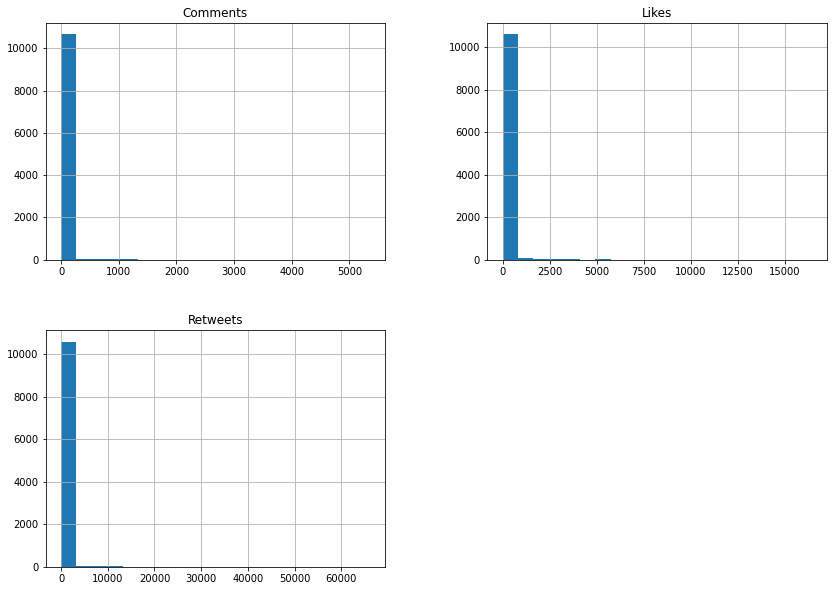

In [23]:
df_interim_p.hist(figsize=(14,10), bins=20)
plt.show()

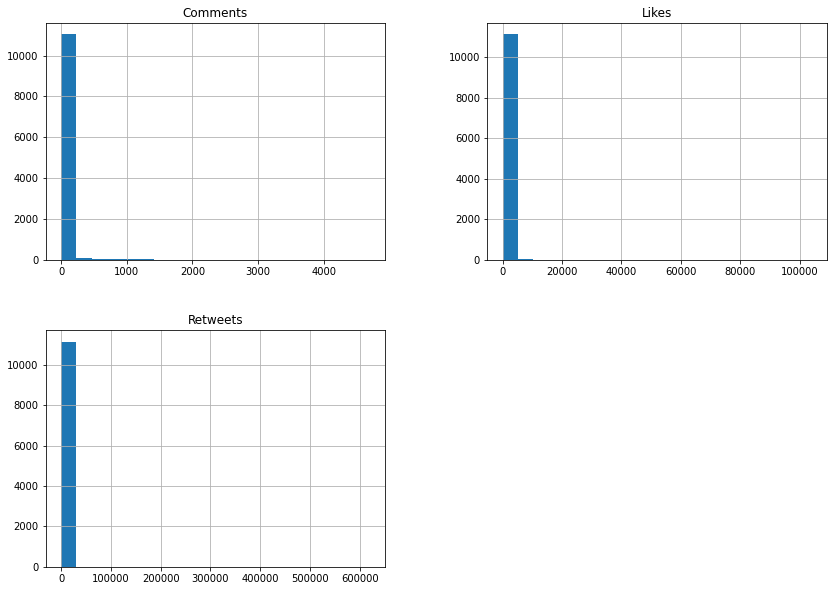

In [24]:
df_interim_z.hist(figsize=(14,10), bins=20)
plt.show()

Define more importan tweets on each dataframe, the rule is:

* For Putin tweets: Comments > 6 & Likes > 19 & Retweets > 70
* For Zelensky tweets: Comments > 3 & Likes > 11 & Retweets > 44

In [25]:
df_interim_p['Top_tweet'] = pd.Categorical(df_interim_p[['Comments', 'Likes', 'Retweets']].apply(lambda x: 1 if x.Comments > 6 and x.Likes > 19 and x.Retweets > 70 else 0, axis = 1))
print(df_interim_p['Top_tweet'].value_counts())

0    9369
1    1367
Name: Top_tweet, dtype: int64


In [26]:
df_interim_z['Top_tweet'] = pd.Categorical(df_interim_z[['Comments', 'Likes', 'Retweets']].apply(lambda x: 1 if x.Comments > 3 and x.Likes > 11 and x.Retweets > 44 else 0, axis = 1))
print(df_interim_z['Top_tweet'].value_counts())

0    9653
1    1498
Name: Top_tweet, dtype: int64


In [27]:
print(f"The total number of distinct users in Putin dataframe is {df_interim_p['UserName'].nunique()}")
print(f"The number of distinct users in the Putin top tweets dataframe is {df_interim_p['UserName'][df_interim_p['Top_tweet'] == 1].nunique()}")


The total number of distinct users in Putin dataframe is 8027
The number of distinct users in the Putin top tweets dataframe is 894


In [28]:
print(f"The total number of distinct users in Zelensky dataframe is {df_interim_z['UserName'].nunique()}")
print(f"The number of distinct users in the Zelensky top tweets dataframe is {df_interim_z['UserName'][df_interim_z['Top_tweet'] == 1].nunique()}")


The total number of distinct users in Zelensky dataframe is 8169
The number of distinct users in the Zelensky top tweets dataframe is 813


In [29]:
df_interim_p.sort_values(by = 'Likes', ascending = False)[['UserName','Tweet', 'Likes']][:10]

UserName  \
3805   @OccupyDemocrats   
6538         @DanRather   
4164    @davenewworld_2   
6800    @TimothyDSnyder   
4311           @atrupar   
4507   @LatestAnonPress   
5477             @POTUS   
2439   @joncoopertweets   
10178     @JackPosobiec   
9634         @JayinKyiv   

                                                                                                                                                                                                                                                                                                                                Tweet  \
3805                                                                                                  BREAKING NEWS: In a major loss for Putin, NATO announces that it is sending an air defense system to Ukraine in order to help it fight off Russia’s bomber jets. RT TO THANK NATO FOR STANDING WITH UKRAINE!\n983\n16.4K\n54.8K   
6538                                                                                                                                  If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K   
4164                                                                                                                                  Russians against Putin are waving a new flag without the red stripe to symbolize the removal of blood from the flag. This is a trend Putin won't want going viral in Russia.\n446\n11.4K\n36.5K   
6800                                                                                                                                                              It is senseless to shelter Putin from the sense that he is losing. He will figure that out for himself, and he will act to protect himself. 1/17\n630\n11.3K\n36.7K   
4311                                                                                                                                        Trump calls for Putin to release dirt on the Biden family right now since now "he's not exactly a fan of our country" during new interview with Real America's Voice\n5,356\n8,504\n15.5K   
4507   It looks like scenes from a horror movie. But it is not!\nThis is the result of the murders of hundreds of civilians by Russian soldiers in Ukraine, in the town of #Bucha near #Kyiv.\n\nPUTIN NEEDS TO BE STOPPED NOW!\nThe following media includes potentially sensitive content. Change settings\nView\n956\n8,245\n22.8K   
5477                                                                                                                   As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K   
2439                                                                                                                                                        President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K   
10178                                                                                                                                                                                 Did John Bolton realize he just publicly admitted the US does coups around the world - like Putin has been saying all along?\n896\n7,336\n29.5K   
9634                                                                                                                                                                                                                 Warning on cigs in Ukraine now says you should quit smoking so you get to see how Putin dies.\n254\n6,177\n31.9K   

       Likes  
3805   16400  
6538   13900  
4164   11400  
6800   11300  
4311    8504  
4507   

In [30]:
df_interim_p.sort_values(by = 'Retweets', ascending = False)[['UserName','Tweet', 'Retweets']][:10]

UserName  \
6538         @DanRather   
2439   @joncoopertweets   
3805   @OccupyDemocrats   
5477             @POTUS   
6800    @TimothyDSnyder   
4164    @davenewworld_2   
2755     @IAPonomarenko   
9634         @JayinKyiv   
10178     @JackPosobiec   
6481            @McFaul   

                                                                                                                                                                                                                                 Tweet  \
6538                                   If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K   
2439                                                         President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K   
3805   BREAKING NEWS: In a major loss for Putin, NATO announces that it is sending an air defense system to Ukraine in order to help it fight off Russia’s bomber jets. RT TO THANK NATO FOR STANDING WITH UKRAINE!\n983\n16.4K\n54.8K   
5477                    As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K   
6800                                                               It is senseless to shelter Putin from the sense that he is losing. He will figure that out for himself, and he will act to protect himself. 1/17\n630\n11.3K\n36.7K   
4164                                   Russians against Putin are waving a new flag without the red stripe to symbolize the removal of blood from the flag. This is a trend Putin won't want going viral in Russia.\n446\n11.4K\n36.5K   
2755                                                                 What’s happening now in Ukraine is absolutely unthinkable.\nAnd I still don’t get it why Russians obey Putin’s absolutely psychopathic orders.\n906\n5,185\n36.4K   
9634                                                                                                                  Warning on cigs in Ukraine now says you should quit smoking so you get to see how Putin dies.\n254\n6,177\n31.9K   
10178                                                                                  Did John Bolton realize he just publicly admitted the US does coups around the world - like Putin has been saying all along?\n896\n7,336\n29.5K   
6481                                            I wish we were hearing more outrage from leaders in the Middle East and Africa about how Putin is showing zero concern about food supplies to your countries. Zero.\n710\n5,507\n29.4K   

       Retweets  
6538      66100  
2439      55300  
3805      54800  
5477      46000  
6800      36700  
4164      36500  
2755      36400  
9634      31900  
10178     29500  
6481      29400

In [31]:
df_interim_p.sort_values(by = 'Comments', ascending = False)[['UserName','Tweet', 'Comments']][:10]

UserName  \
4311          @atrupar   
8888            @POTUS   
6538        @DanRather   
5477            @POTUS   
3952  @joncoopertweets   
6996        @AnonOpsSE   
2439  @joncoopertweets   
949         @B52Malmet   
541        @marcorubio   
4003    @JustinTrudeau   

                                                                                                                                                                                                                                                                                                          Tweet  \
4311                                                                                                                  Trump calls for Putin to release dirt on the Biden family right now since now "he's not exactly a fan of our country" during new interview with Real America's Voice\n5,356\n8,504\n15.5K   
8888                                                                                  We could have turned a blind eye to Putin’s barbaric war against Ukraine and the price of gas wouldn’t have spiked the way it has, but America rose to the moment.\n\nWe proudly stand with Ukraine.\n5,165\n3,446\n17.6K   
6538                                                                                                            If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K   
5477                                                                                             As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K   
3952                                                                                                                    I’m curious. On a scale of 1 to 10, how badly do you want Putin's invasion of Ukraine to end up being the most historical embarrassment Russia has ever initiated?\n2,821\n1,767\n18.6K   
6996                                                                                                                                                                                                                                  Looks like Putin has start wearing bulletproof vest.\n1,729\n4,413\n23.8K   
2439                                                                                                                                  President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K   
949                                                                                                                                                                                                                                 Does Tucker Carlson have a soft spot for Vladimir Putin?\n1,294\n750\n5,487   
541                                                                                                                                                                                           It is now almost certain that Putin will attempt to occupy at least parts of Ukraine very soon\n1,290\n486\n1,735   
4003  Sat down with Prime Minister \n@MarinSanna\n this afternoon. We’re united against Putin’s attack on Ukraine, and in support of the Ukrainian people. And we’ll keep working together to coordinate our ongoing response and to advance our shared priorities – such as climate change.\n1,109\n313\n2,084   

      Comments  
4311      5356  
8888      5165  
6538      4473  
5477      4050  
3952      2821  
6996      1729  
2439      1525  
949       1294  
541       1290  
4003      1109

In [32]:
df_interim_z.sort_values(by = 'Likes', ascending = False)[['UserName','Tweet', 'Likes']][:10]

UserName  \
2882     @BenjaminRamm   
2723      @antontroian   
4028  @KyivIndependent   
4606    @ChristopherJM   
3542    @joshscampbell   
1529       @Jim_Jordan   
3181       @BrianKarem   
5427  @KyivIndependent   
6140  @KyivIndependent   
5555     @DAlperovitch   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Tweet  \
2882                                                                                                                                                                                                                                                                                                      During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K   
2723                                                                                                                                                                                                                                                                                             Zelensky addressing the Russian people in Russian now: \n“Today I initiated a phone call with the president of the Russian Federation. The result was silence, though the silence should be in the Donbas. As a result I want to address all citizens of Russia…\n269\n10.7K\n29.8K   
4028                                                                                                                                                                                                                                                                           Zelensky to Russian pilots:\n\n"I want to repeat once again to all Russian pilots who do not think about the orders they carry out: Killing civilians is a crime, and you will pay," Zelensky said. "Today or tomorrow is less important. The main thing is that it's inevitable."\n352\n9,922\n49.3K   
4606                                                                                                                                                                                                                                                                     Powerful, passionate address from Zelensky tonight. Switching from Ukrainian to Russian he addresses mothers of soldiers who committed horrific war crimes in Bucha, Irpin, Hostomel, asking how they raised “butchers,” and he tells Moscow to see how it’s orders are being fulfilled.\n604\n9,811\n27.7K   
3542  Still stunning in hindsight...\n\nZelensky: "We are ready to continue to cooperate for the next steps, specifically we are almost ready to buy more Javelins from the United States for defense purposes."\n\nTrump: "I would like you to do us a favor though..."\ncnn.com\nRead Trump's phone conversation with Volodymyr Zelensky | CNN Politics\nPresident Donald Trump repeatedly pushed for Ukrainian President Volodymr Zelensky to investigate former Vice President Joe Biden, and his son, Hunter, during a July 25 phone call, according to a...\n584\n8,565\n24.2K   
1529                                                                                                                                                                                                                                                                                                                           

In [33]:
df_interim_z.sort_values(by = 'Retweets', ascending = False)[['UserName','Tweet', 'Retweets']][:10]

UserName  \
2882     @BenjaminRamm   
7830      @ZelenskyyUa   
4028  @KyivIndependent   
3181       @BrianKarem   
6140  @KyivIndependent   
9277      @ZelenskyyUa   
1529       @Jim_Jordan   
5427  @KyivIndependent   
7186  @KyivIndependent   
2723      @antontroian   

                                                                                                                                                                                                                                                                                                           Tweet  \
2882                                  During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K   
7830                        Congratulations on the Platinum anniversary of the reign of the Queen of  Her Majesty Elizabeth II \n@RoyalFamily\n. Grateful for supporting  in the fight for our freedom and independence. I wish Her Majesty well-being and peace and prosperity to  people.\n1,006\n5,623\n65.9K   
4028       Zelensky to Russian pilots:\n\n"I want to repeat once again to all Russian pilots who do not think about the orders they carry out: Killing civilians is a crime, and you will pay," Zelensky said. "Today or tomorrow is less important. The main thing is that it's inevitable."\n352\n9,922\n49.3K   
3181                                                                                                                                                                   NOW: Ukrainian President Zelensky releases a video statement to counter Russian propaganda that he's fled his country.\n474\n7,134\n49.2K   
6140   Zelensky: Ukraine seeks full restoration of territory, including Crimea. \n\nSpeaking at the WSJ's CEO Council Summit on May 3, President Zelensky said  Ukraine's goals are to halt Russia’s advance, reclaim territory, and to restore Ukraine’s entire territory through diplomacy.\n706\n6,453\n37.1K   
9277                        I commend US historic decision to provide UA with new security assistance package, including modern air defense systems. Thank you \n@POTUS\n for your continued leadership and support of UA in its fight against the aggressor. Together towards the victory!\n1,147\n4,899\n34.9K   
1529                                                                       Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K   
5427  Zelensky: 'If we had access to all the weapons we need, which our partners have, we would have already ended this war.' \n\nZelensky renewed calls for weapons to Ukraine, saying “it is unfair that Ukraine is still forced to ask for what its partners have been storing for years.”\n701\n6,647\n31.1K   
7186            Zelensky: 'Russia will also have to leave Crimea.' \n\nPresident Zelensky said during his daily address that Russia will also have to leave Kherson, Melitopol, Enerhodar, Mariupol, and "all other cities and communities where they are still pretending to be the owners.”\n658\n5,148\n30.8K   
2723                         Zelensky addressing the Russian people in Russian now: \n“Today I initiated a phone call with the president of the Russian Federation. The result was silence, though the silence should be in the Donbas. As a result I want to address all citizens of Russia…\n269\n10.7K\n29.8K   

      Retweets  
2882    620000  
7830     65900  
4028     49300  
3181     49200  
6140     37100  
9277     34900  
1529     33400  
5427     31100  
7186     30800  
2723     29800

In [34]:
df_interim_z.sort_values(by = 'Comments', ascending = False)[['UserName','Tweet', 'Comments']][:10]

UserName  \
6085                               @llambchops   
1529                               @Jim_Jordan   
5215                            @GodandtheBear   
9510   Jordan Schachtel @ dossier.substack.com   
2882                             @BenjaminRamm   
8513                             @BorisJohnson   
1896                                     @Acyn   
3792                             @cov_Gretchen   
10211                             @ZelenskyyUa   
3541                             @DAlperovitch   

                                                                                                                                                                                                                                                                                                                                                                                       Tweet  \
6085                                                                                                                                                                                                                            Zelensky posing with Pelosi and Schiff makes me wonder about him and this whole operation. \n\nWhat do you think?  Are we being played?\n4,698\n3,026\n13.7K   
1529                                                                                                                                                   Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K   
5215                                                                                                                                                                                                                                       Zelensky on tv saying we shouldn't be scared of nukes, we should be ready? Can anyone explain how you get ready to be nuked?\n3,546\n4,851\n29.7K   
9510                                                                                                                                                                                                                                                                           Zelensky just said Ukraine is gonna need a cool $750 billion to keep his country running. \n3,446\n4,843\n18K   
2882                                                                                                              During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K   
8513   Putin’s grand imperial design for the total reconquest of Ukraine has been derailed.\n\nThere are four vital steps we must take to strengthen the hand of our Ukrainian friends and ensure we finish this war on the terms that \n@ZelenskyyUa\n has laid out.\nthetimes.co.uk\nThe Times & The Sunday Times\nNews and opinion from The Times & The Sunday Times\n2,453\n2,319\n12.5K   
1896                                                                                            Jim Jordan, who is refusing to testify about his phone call with Trump, asks why won’t Biden release the transcript of his phone call with Zelensky and complains the elite left get to abide by a certain set of rules and “we regular folk got to follow another set”\n1,505\n1,105\n4,069   
3792                                                                                                                                                                                 Does Zelensky have a $34 MILLION DOLLAR HOME in Miami?! I do not like any of this. There is too much corruption and seems like we are footing the bill.\n\nCan someone fact check?\n1,315\n2,533\n12.7K   
10211                          

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


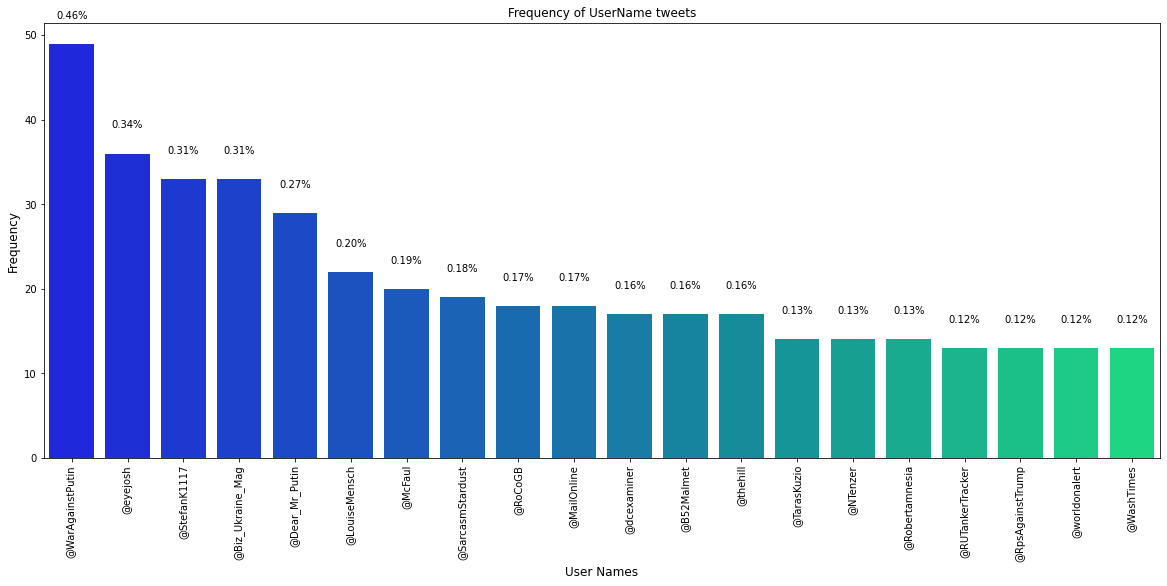

In [35]:
utils.plot_frequency_charts(df_interim_p, 'UserName', 'User Names','winter')

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


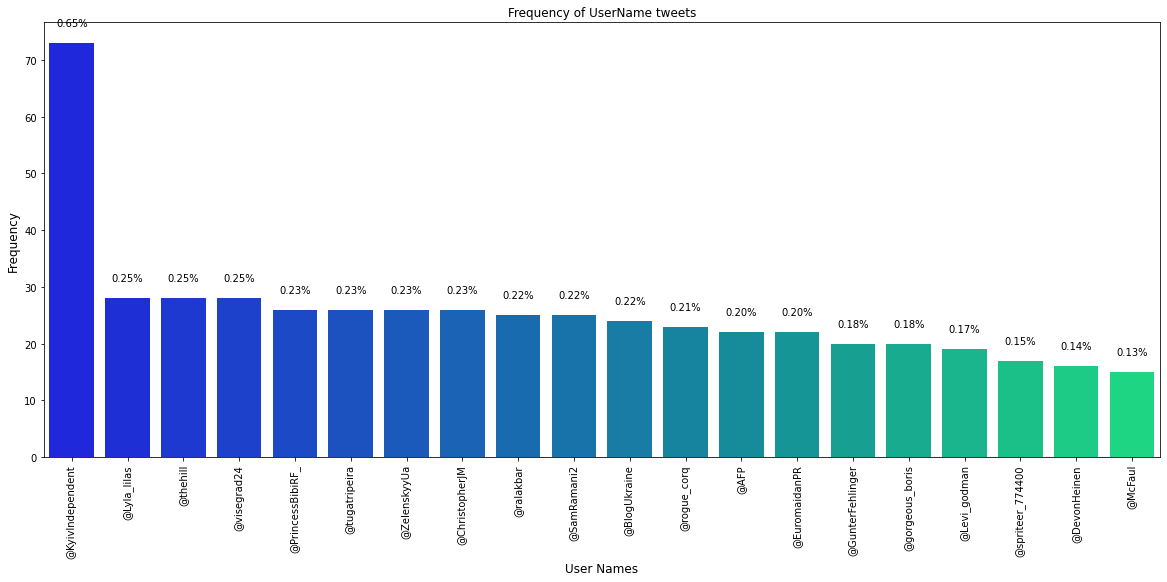

In [36]:
utils.plot_frequency_charts(df_interim_z, 'UserName', 'User Names','winter')

In [37]:
# save interim dataframes
df_interim_p.to_csv('../data/interim/Putin_tweets.csv', index=False)
df_interim_z.to_csv('../data/interim/Zelensky_tweets.csv', index=False)

In [38]:
# common words in Putin's dataframe
print(df_interim_p['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:30])

putin        13055
ukraine       4188
russia        3069
russian       2402
war           2058
say           1603
trump         1263
vladimir      1242
president     1122
would         1120
us            1066
biden         1021
like           957
go             895
get            882
people         874
nato           791
want           780
think          774
know           771
make           758
world          745
take           724
one            714
invasion       638
call           580
time           567
invade         565
state          516
right          511
dtype: int64


In [39]:
# common words in Zelensky's dataframe
df_interim_z['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:30]

ukraine      5188
zelensky     4924
president    2366
russia       2139
others       1952
ukrainian    1564
war          1458
russian      1381
say          1340
putin        1332
people       1080
us            901
volodymyr     816
support       765
world         737
would         706
country       699
need          696
get           659
like          648
go            642
biden         634
time          620
make          608
one           590
give          555
know          552
call          551
thank         545
nato          539
dtype: int64

In [40]:
# define common words to omit
common_words = ['vladimir', 'putin', 'volodymyr', 'zelensky', 'russia', 'russian', 'russians', 'ukraine', 'ukrainian', 'president', 'u'] 

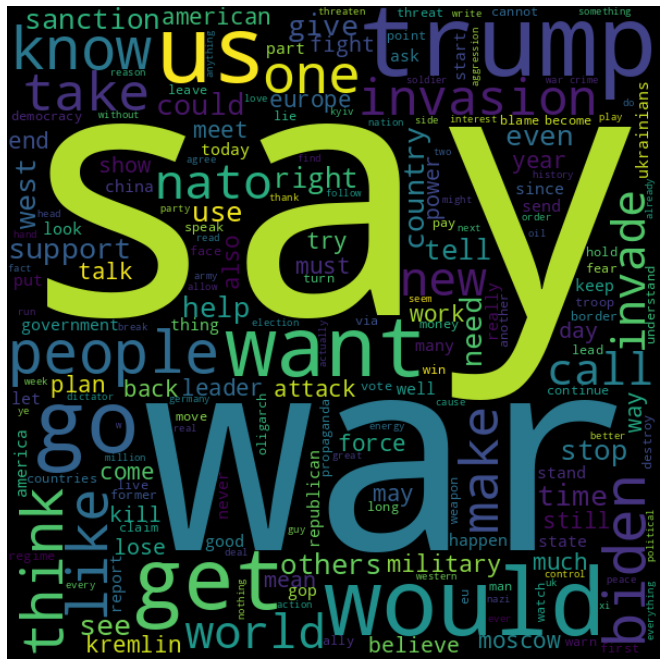

In [41]:
# Putin WordCloud (1 word)
wordcloud = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_interim_p.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

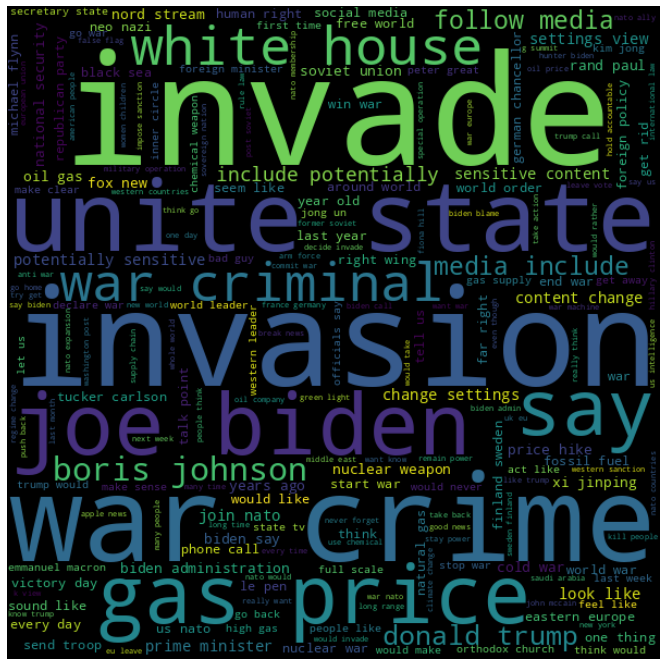

In [42]:
# Putin WordCloud (2 words)
wordcloud = WordCloud(width=600, height=600, collocation_threshold = 2, stopwords=common_words).generate(' '.join(i for i in df_interim_p.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

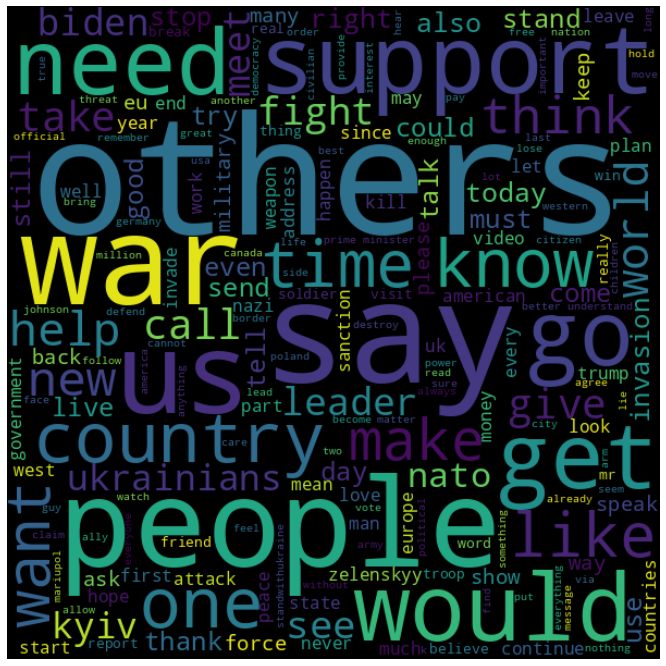

In [43]:
# Zelensky WordCloud (1 word)
wordcloud = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_interim_z.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

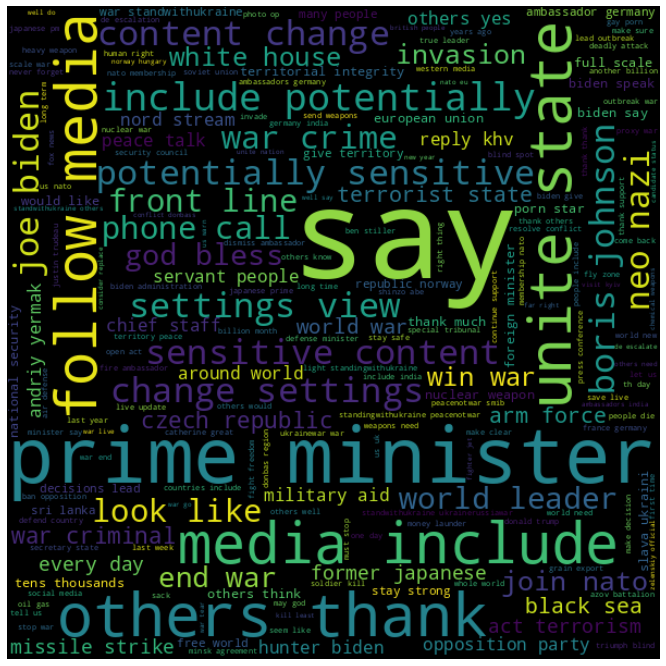

In [44]:
# Zelensky WordCloud (2 words)
wordcloud = WordCloud(width=600, height=600, collocation_threshold = 2, stopwords=common_words).generate(' '.join(i for i in df_interim_z.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Check the frequency of word "putin" appear in Zelensky dataframe

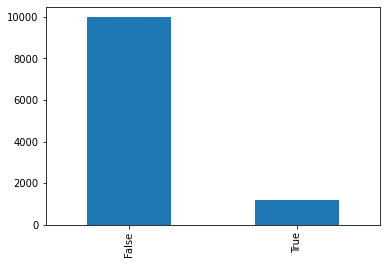

In [45]:
putin_in_zelenzky = df_interim_z['Clean_Tweet'].apply(lambda x: True if 'putin' in x else False)
putin_in_zelenzky.value_counts().plot.bar()
plt.show()

Check the frequency of word "zelensky" appear in Putin dataframe

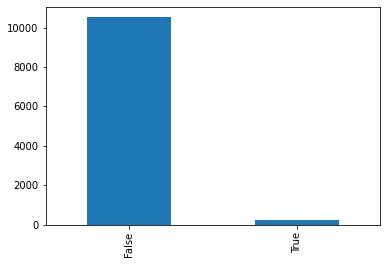

In [46]:
zelenzky_in_putin = df_interim_p['Clean_Tweet'].apply(lambda x: True if 'zelensky' in x else False)
zelenzky_in_putin.value_counts().plot.bar()
plt.show()

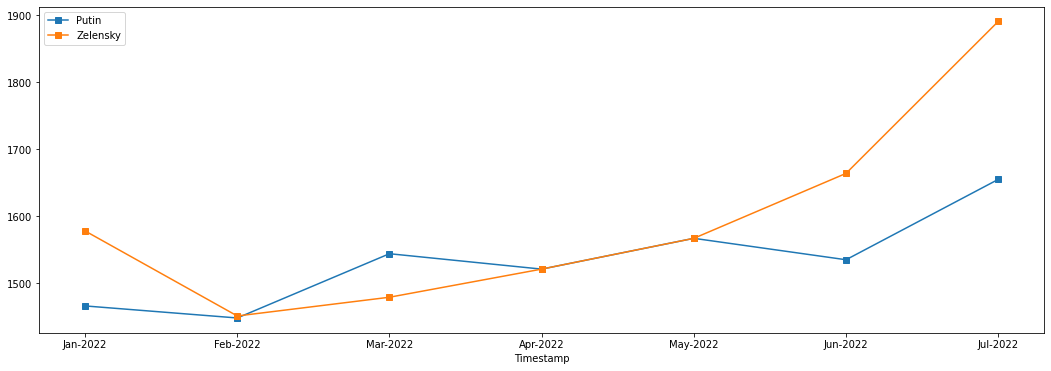

In [47]:
# Plot number of tweets from each president by month
plt.figure(figsize=(18,6))
df_interim_p.groupby(pd.to_datetime(df_interim_p['Timestamp']).dt.strftime('%b-%Y'), sort=False)['Clean_Tweet'].size().plot(label= 'Putin', marker = 's')
df_interim_z.groupby(pd.to_datetime(df_interim_z['Timestamp']).dt.strftime('%b-%Y'), sort=False)['Clean_Tweet'].size().plot(label= 'Zelensky', marker = 's')
plt.legend()
plt.show()

## Different libraries to apply sentiment analysis

### **vader**

In [48]:
sentiments = SentimentIntensityAnalyzer()

df_interim_p["vader_Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_interim_p["Clean_Tweet"]]
df_interim_p["vader_Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_interim_p["Clean_Tweet"]]
df_interim_p["vader_Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_interim_p["Clean_Tweet"]]
df_interim_p['vader_Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df_interim_p["Clean_Tweet"]]

df_interim_z["vader_Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_interim_z["Clean_Tweet"]]
df_interim_z["vader_Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_interim_z["Clean_Tweet"]]
df_interim_z["vader_Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_interim_z["Clean_Tweet"]]
df_interim_z['vader_Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df_interim_z["Clean_Tweet"]]

In [49]:
# add sentiment according to polarity
score_p = df_interim_p["vader_Compound"].values
sentiment_p = []
for i in score_p:
    if i >= 0.05 :
        sentiment_p.append('Positive')
    elif i <= -0.05 :
        sentiment_p.append('Negative')
    else:
        sentiment_p.append('Neutral')
df_interim_p["vader_Sentiment"] = sentiment_p

score_z = df_interim_z["vader_Compound"].values
sentiment_z = []
for i in score_z:
    if i >= 0.05 :
        sentiment_z.append('Positive')
    elif i <= -0.05 :
        sentiment_z.append('Negative')
    else:
        sentiment_z.append('Neutral')
df_interim_z["vader_Sentiment"] = sentiment_z

In [50]:
print(df_interim_p["vader_Sentiment"].value_counts())

Negative    5280
Positive    3988
Neutral     1468
Name: vader_Sentiment, dtype: int64


In [51]:
print(df_interim_z["vader_Sentiment"].value_counts())

Positive    5232
Negative    4012
Neutral     1907
Name: vader_Sentiment, dtype: int64


### **textblob**

In [52]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df_interim_p['textblob_Polarity'] = df_interim_p['Clean_Tweet'].apply(get_polarity)
df_interim_z['textblob_Polarity'] = df_interim_z['Clean_Tweet'].apply(get_polarity)

In [53]:
# add sentiment according to polarity

df_interim_p['textblob_Sentiment']=''
df_interim_p.loc[df_interim_p.textblob_Polarity>0,'textblob_Sentiment']='Positive'
df_interim_p.loc[df_interim_p.textblob_Polarity==0,'textblob_Sentiment']='Neutral'
df_interim_p.loc[df_interim_p.textblob_Polarity<0,'textblob_Sentiment']='Negative'

df_interim_z['textblob_Sentiment']=''
df_interim_z.loc[df_interim_z.textblob_Polarity>0,'textblob_Sentiment']='Positive'
df_interim_z.loc[df_interim_z.textblob_Polarity==0,'textblob_Sentiment']='Neutral'
df_interim_z.loc[df_interim_z.textblob_Polarity<0,'textblob_Sentiment']='Negative'

In [54]:
print(df_interim_p["textblob_Sentiment"].value_counts())

Positive    4605
Negative    3082
Neutral     3049
Name: textblob_Sentiment, dtype: int64


In [55]:
print(df_interim_z["textblob_Sentiment"].value_counts())

Positive    4893
Neutral     3945
Negative    2313
Name: textblob_Sentiment, dtype: int64


### **flair**

In [56]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-08-27 00:20:06,861 loading file /home/gitpod/.flair/models/sentiment-en-mix-distillbert_4.pt


In [57]:
sentiment_p = []
confidence_p = []

for sentence in df_interim_p['Clean_Tweet']:
	if sentence.strip() == "":
		sentiment_p.append("")
		confidence_p.append("")
	else:
		sample = flair.data.Sentence(sentence)
		sentiment_model.predict(sample)

		sentiment_p.append(sample.labels[0].value)
		confidence_p.append(sample.labels[0].score)

In [58]:
df_interim_p['flair_Sentiment'] = sentiment_p
df_interim_p['flair_Confidence'] = confidence_p

In [59]:
sentiment_z = []
confidence_z = []

for sentence in df_interim_z['Clean_Tweet']:
	if sentence.strip() == "":
		sentiment_z.append("")
		confidence_z.append("")
	else:
		sample = flair.data.Sentence(sentence)
		sentiment_model.predict(sample)

		sentiment_z.append(sample.labels[0].value)
		confidence_z.append(sample.labels[0].score)

In [60]:
df_interim_z['flair_Sentiment'] = sentiment_z
df_interim_z['flair_Confidence'] = confidence_z

In [61]:
print(df_interim_p["flair_Sentiment"].value_counts())

NEGATIVE    8938
POSITIVE    1798
Name: flair_Sentiment, dtype: int64


In [62]:
print(df_interim_z["flair_Sentiment"].value_counts())

NEGATIVE    7230
POSITIVE    3921
Name: flair_Sentiment, dtype: int64


Show the results

In [63]:
df_interim_p.sample(10)

Timestamp          UserName  Comments  Likes  Retweets Is_response  \
8462  2022-06-18       @JanJak_AMC         0      0         7           1   
5370  2022-04-18   @MsAnnibyniaeth         0      1         6           1   
3696  2022-03-17  @OccupyDemocrats        26   1523      4047           0   
366   2022-01-08     @EuromaidanPR         0      4        11           0   
6193  2022-05-05   @selectedwisdom       184    716      2579           0   
6986  2022-05-20            @yubet         3      1         5           1   
8323  2022-06-16  @spriteer_774400        63     99       598           0   
3151  2022-03-05     @dennismhogan         0      0        19           0   
8113  2022-06-12  @Mamako_Hitakami         0      4         7           0   
2155  2022-02-14      @trading_axe         0      1        35           0   

     Quote_another  \
8462             0   
5370             0   
3696             0   
366              0   
6193             1   
6986             0   
8323             0   
3151             0   
8113             1   
2155             0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Tweet  \
8462                                                                                                                                                                                                                                                                                                                                                                                                                                      Replying to \n@rocketastronaut\nPutin did that \n7   
5370                                                                                                                                                                                                         Replying to \n@NoIAmTonyGreen\nBut ministers and mps probably don’t own enough land or have sufficient business interest in France - even though doing it in France would shave a hell of a lot of the money we don’t have.\n\nUnless Putin’s oligarchs are financing it?\n1\n6   
3696                                                                                                                                                                                                                                                                            BREAKING: Vitali Klitschko, the mayor of Kyiv, bluntly refutes Putin's lies that Russia is "only targeting military targets," says that claim is "bullshit." RT IF YOU STAND WITH UKRAINE!\n26\n1,523\n4,047   
366                                     Peacekeepers are not needed in Kazakhstan. But hey, since Putin set the precedent, NATO should send in peacekeepers to ensure that Ukraine is not attacked.\nreuters.com\nU.S. questions Russia-led peacekeeping troops in Kazakhstan\nThe United States is closely monitoring reports that peacekeeping forces of the Russia-led Collective Security Treaty Organization have been deployed to Kazakhstan and has questions about whether...\n4\n11   
6193  Absolutely bonkers, and I imagine the former President was serious, and an unlawful order. That may be the most Putin type thing I’ve heard so far.\nQuote Tweet\nMaggie Haberman\n@maggieNYT\n · May 5\nNEW: Mark Esper recounts Trump asking the stunned SecDef if the government could fire missiles into Mexico and then pretend it wasn’t the US who did it in his new memoir https://nytimes.com/2022/05/05/us/politics/mark-esper-book.html…\nShow this thread\n184\n716\n2,579   
6986                                

In [64]:
df_interim_z.sample(10)

Timestamp          UserName  Comments  Likes  Retweets Is_response  \
2631   2022-02-21      @Joyce_Karam         3     43       104           0   
2482   2022-02-18    @cryptodailyuk         0      0         2           0   
9677   2022-07-07  @lisajaynesmithy         0      0         3           1   
10995  2022-07-15         @SimonWDC         5     38        76           0   
10459  2022-07-12         @jonothar         0      5        10           0   
7998   2022-06-07  @rejectedthought         1      0         1           1   
4188   2022-03-25       @vpatryshev         0      1        11           1   
9544   2022-07-05        @AggieLiza         0      0         1           1   
86     2022-01-02     @nbayoungdork         0      0         1           1   
3711   2022-03-15   @chrystelgordon         3      0         2           1   

      Quote_another  \
2631              0   
2482              0   
9677              0   
10995             0   
10459             0   
7998              0   
4188              0   
9544              0   
86                0   
3711              0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Tweet  \
2631                                                                                                                                                                                                                                                                                                                                                              US, UK, FR still rolling out limited sanctions tomorrow. \n\nZelensky addressing nation tonight\n3\n43\n104   
2482                        Ukraine Adopts Law To Legalize #Cryptocurrencies Amidst Escalating Tensions With Russia \n@FedorovMykhailo\n @ZelenskyyUa\ncryptodaily.co.uk\nUkraine Adopts Law To Legalize Cryptocurrencies Amidst Escalating Tensions With Russia\nUkraine has moved to announce that it has legalized cryptocurrencies as crypto donations to Ukrainian volunteer and hacking groups soared as tensions with Russia reach a crescendo, with fears of an...\n2   
9677                                                                                                                                                                                                                                                                                                                                                                                      Replying to \n@CathyGraphics3\n @BorisJohnson\n and \n@ZelenskyyUa\nOr a fridge?\n3   
10995  The blaming of Biden for higher gas prices is both a lie and something which is aiding Putin's war effort, for it deflects blame from him w/US voters.  \n\nContinued alignment of GOP against US/Western interests should be getting far more attention. 3/\nbbc.com\nHungary election: PM Viktor Orban criticises Ukraine's Zelensky as he wins vote\nNear-complete results show Viktor Orban has won a fourth term in Hungary's election by a landslide.\n5\n38\n76   
10459                                                               #Zelensky mobilizing a ’MILLION strong’ army, using #NATO-supplied weapons, to recapture lost territory in East & South #Ukraine!!\ndailymail.co.uk\nMillion-strong army of Ukrainians takes on Vladimir Putin's troops\nA counter-offensive using Nato-supplied weapons would take the fight to Moscow's troops in the south and east of the country, said defence minister Oleksii Reznikov, 56.\n5\n10   
7998                                                                                                     

Save to processed folder

In [65]:
# save final dataframes
df_interim_p.to_csv('../data/processed/Putin_tweets.csv', index=False)
df_interim_z.to_csv('../data/processed/Zelensky_tweets.csv', index=False)

## EDA to processed dataframes

### Load the processed dataframes

In [66]:
# read the final dataframes
df_final_p= pd.read_csv('../data/processed/Putin_tweets.csv')
df_final_z= pd.read_csv('../data/processed/Zelensky_tweets.csv')

In [67]:
df_final_p.head()

Timestamp          UserName  Comments  Likes  Retweets  Is_response  \
0  2022-01-01  @FreeSyrianMemes         0      3        35            0   
1  2022-01-01       @_ciciulena         1      2        38            0   
2  2022-01-01  @lonestarmoocher        10     10        56            0   
3  2022-01-01       @TomLondon6         9    218       813            0   
4  2022-01-01         @ukemonde         0      7        16            0   

   Quote_another  \
0              0   
1              0   
2              0   
3              0   
4              1   

                                                                                                                                                                                                                                                                                Tweet  \
0                                                                                                                Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35   
1                                                                                                                                                                                                                                                 PUTIN?????????? #CIAO2021\n1\n2\n38   
2                                                                                                                                                                                                                              Looks like Lumpy had a meeting with Putin.\n10\n10\n56   
3                                                        What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813   
4  Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16   

                                                                                                                                             Clean_Tweet  \
0                                 halt russian aggression day ship atgms syrian rebel ukraine poland finland anyone else want send wire guide fuck putin   
1                                                                                                                                             putin ciao   
2                                                                                                                             look like lumpy meet putin   
3  kind country honour war criminals like blair imprison man publish evidence war crimes like assange putin russia xi china repressive tinpot country uk   
4                                                                                                                                    time putin tribunal   

   Top_tweet  vader_Positive  vader_Negative  vader_Neutral  vader_Compound  \
0          0           0.055           0.309          0.636         -0.7184   
1          0           0.000           0.000          1.000          0.0000   
2          0           0.385           0.000          0.615          0.3612   
3          1           0.295           0.339          0.366         -0.4215   
4          0           0.000           0.000          1.000          0.0000   

  vader_Sentiment  textblob_Polarity textblob_Sentiment flair_Sentiment  \
0        Negative               -0.2           Negative        NEGATIVE   
1         Neutral                0.0            Neutral        NEGATIVE   
2        Positive                0.0            Neutral        NEGATIVE   
3        Negative                

In [68]:
df_final_z.head()

Timestamp          UserName  Comments  Likes  Retweets  Is_response  \
0  2022-01-01     @HillReporter        13    148       701            0   
1  2022-01-01  @starsandstripes         6      9        29            0   
2  2022-01-01        @jamiemfly         0      9        31            0   
3  2022-01-01   @I_Katchanovski         1      9        21            0   
4  2022-01-01  @BhadraPunchline         4      4         7            0   

   Quote_another  \
0              0   
1              0   
2              0   
3              0   
4              0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Tweet  \
0                                                                                                             President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701   
1  Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29   
2                                  Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31   
3                                                                                               #Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21   
4                      Zelensky: "No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n4\n4\n7   

                                                                             

In [69]:
# convert variables in the right type

df_final_p['Timestamp'] = df_final_p['Timestamp'].astype('datetime64')
df_final_p['UserName'] = pd.Categorical(df_final_p['UserName'])
df_final_p['Is_response'] = pd.Categorical(df_final_p['Is_response'])
df_final_p['Quote_another'] = pd.Categorical(df_final_p['Quote_another'])
df_final_p['Top_tweet'] = pd.Categorical(df_final_p['Top_tweet'])
df_final_p['vader_Sentiment'] = pd.Categorical(df_final_p['vader_Sentiment'])
df_final_p['textblob_Sentiment'] = pd.Categorical(df_final_p['textblob_Sentiment'])
df_final_p['flair_Sentiment'] = pd.Categorical(df_final_p['flair_Sentiment'])

df_final_z['Timestamp'] = df_final_z['Timestamp'].astype('datetime64')
df_final_z['UserName'] = pd.Categorical(df_final_z['UserName'])
df_final_z['Is_response'] = pd.Categorical(df_final_z['Is_response'])
df_final_z['Quote_another'] = pd.Categorical(df_final_z['Quote_another'])
df_final_z['Top_tweet'] = pd.Categorical(df_final_z['Top_tweet'])
df_final_z['vader_Sentiment'] = pd.Categorical(df_final_z['vader_Sentiment'])
df_final_z['textblob_Sentiment'] = pd.Categorical(df_final_z['textblob_Sentiment'])
df_final_z['flair_Sentiment'] = pd.Categorical(df_final_z['flair_Sentiment'])


In [70]:
df_final_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10736 entries, 0 to 10735
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           10736 non-null  datetime64[ns]
 1   UserName            10736 non-null  category      
 2   Comments            10736 non-null  int64         
 3   Likes               10736 non-null  int64         
 4   Retweets            10736 non-null  int64         
 5   Is_response         10736 non-null  category      
 6   Quote_another       10736 non-null  category      
 7   Tweet               10736 non-null  object        
 8   Clean_Tweet         10736 non-null  object        
 9   Top_tweet           10736 non-null  category      
 10  vader_Positive      10736 non-null  float64       
 11  vader_Negative      10736 non-null  float64       
 12  vader_Neutral       10736 non-null  float64       
 13  vader_Compound      10736 non-null  float64   

In [71]:
df_final_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11151 entries, 0 to 11150
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           11151 non-null  datetime64[ns]
 1   UserName            11151 non-null  category      
 2   Comments            11151 non-null  int64         
 3   Likes               11151 non-null  int64         
 4   Retweets            11151 non-null  int64         
 5   Is_response         11151 non-null  category      
 6   Quote_another       11151 non-null  category      
 7   Tweet               11151 non-null  object        
 8   Clean_Tweet         11151 non-null  object        
 9   Top_tweet           11151 non-null  category      
 10  vader_Positive      11151 non-null  float64       
 11  vader_Negative      11151 non-null  float64       
 12  vader_Neutral       11151 non-null  float64       
 13  vader_Compound      11151 non-null  float64   

In [72]:
# change flair sentiment categories
cat = {'flair_Sentiment': {'NEGATIVE': 'Negative', 'POSITIVE': 'Positive'}}
df_final_p = df_final_p.replace(cat)
df_final_z = df_final_z.replace(cat)

In [73]:
# check result in Putin's dataframe
df_final_p['flair_Sentiment'].value_counts()

Negative    8938
Positive    1798
Name: flair_Sentiment, dtype: int64

In [74]:
# check result in Zelensky's dataframe
df_final_z['flair_Sentiment'].value_counts()

Negative    7230
Positive    3921
Name: flair_Sentiment, dtype: int64

### Compare results between different models

In [75]:
# vader vs textblob - Putin
confusion_matrix(df_final_p['vader_Sentiment'], df_final_p['textblob_Sentiment'], labels = ['Negative', 'Neutral', 'Positive'])

array([[2186, 1285, 1809],
       [ 184,  924,  360],
       [ 712,  840, 2436]])

In [76]:
# vader vs textblob - Zelensky
confusion_matrix(df_final_z['vader_Sentiment'], df_final_z['textblob_Sentiment'], labels = ['Negative', 'Neutral', 'Positive'])

array([[1515, 1179, 1318],
       [ 207, 1275,  425],
       [ 591, 1491, 3150]])

In [77]:
# vader vs flair (flair haven't Neutral category) - Putin
confusion_matrix(df_final_p['vader_Sentiment'], df_final_p['flair_Sentiment'], labels = ['Negative', 'Neutral', 'Positive'])

array([[4809,    0,  471],
       [1204,    0,  264],
       [2925,    0, 1063]])

In [78]:
# vader vs flair (flair haven't Neutral category) - Zelensky
confusion_matrix(df_final_z['vader_Sentiment'], df_final_z['flair_Sentiment'], labels = ['Negative', 'Neutral', 'Positive'])

array([[3505,    0,  507],
       [1148,    0,  759],
       [2577,    0, 2655]])

In [79]:
# textblob vs flair (flair haven't Neutral category) - Putin
confusion_matrix(df_final_p['textblob_Sentiment'], df_final_p['flair_Sentiment'], labels = ['Negative', 'Neutral', 'Positive'])

array([[2811,    0,  271],
       [2585,    0,  464],
       [3542,    0, 1063]])

In [80]:
# textblob vs flair (flair haven't Neutral category) - Zelensky
confusion_matrix(df_final_z['textblob_Sentiment'], df_final_z['flair_Sentiment'], labels = ['Negative', 'Neutral', 'Positive'])

array([[2004,    0,  309],
       [2462,    0, 1483],
       [2764,    0, 2129]])

In [81]:
# correlation matrix between numerical variables - Putin
df_final_p.corr().style.background_gradient(cmap='Blues')

In [82]:
# correlation matrix between numerical variables - Zelensky
df_final_z.corr().style.background_gradient(cmap='Blues')

### WordCloud according to model, type of sentiment and president

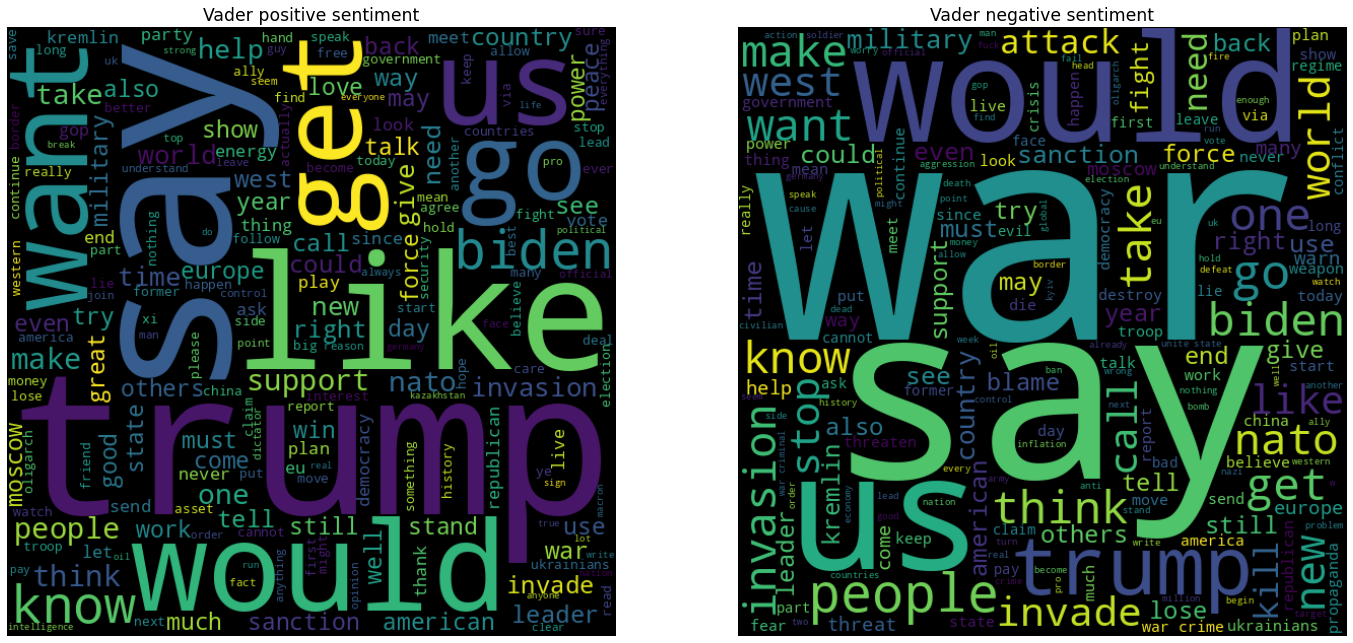

In [83]:
# Putin WordCloud (1 word) - vader

fig, ax = plt.subplots(1, 2, figsize = (24, 24))

# Positive
wordcloud_pos = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_p[df_final_p['vader_Sentiment'] == 'Positive'].Clean_Tweet))
ax[0].set_title('Vader positive sentiment', fontsize = 'xx-large')
ax[0].imshow(wordcloud_pos, interpolation = 'bilinear')
ax[0].axis("off")

# Positive
wordcloud_neg = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_p[df_final_p['vader_Sentiment'] == 'Negative'].Clean_Tweet))
ax[1].set_title('Vader negative sentiment', fontsize = 'xx-large')
ax[1].imshow(wordcloud_neg, interpolation = 'bilinear')
ax[1].axis("off")

fig.show()

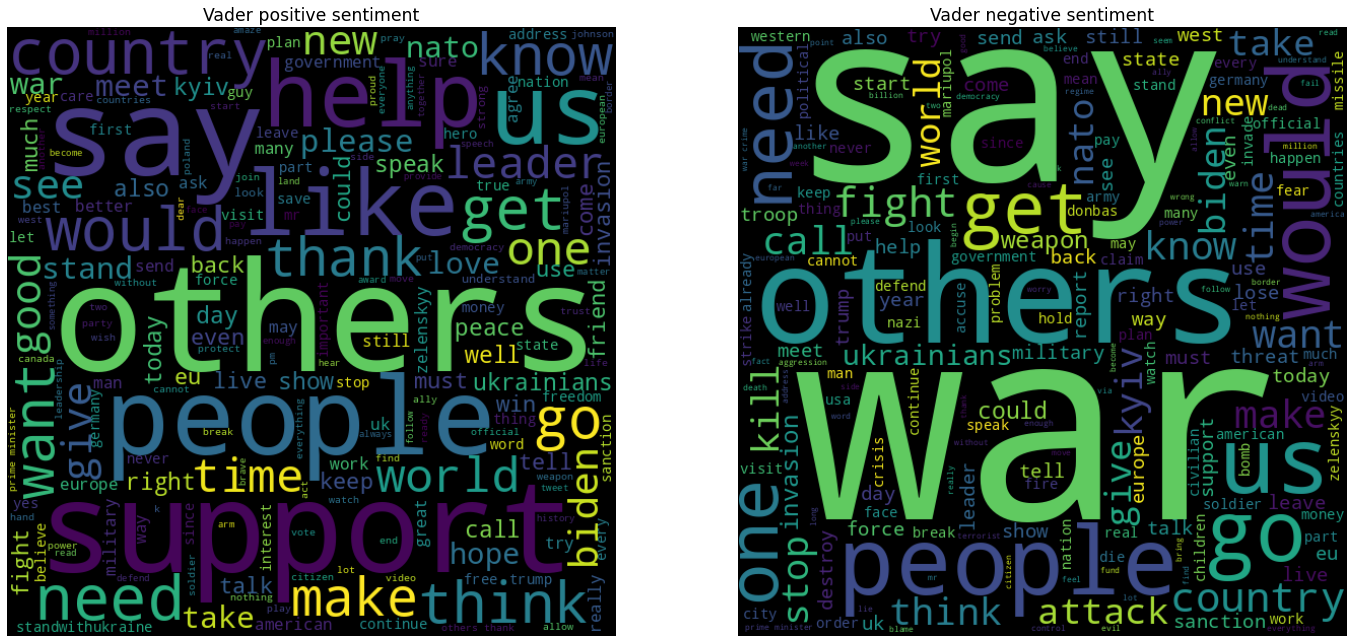

In [84]:
# Zelensky WordCloud (1 word) - vader

fig, ax = plt.subplots(1, 2, figsize = (24, 24))

# Positive
wordcloud_pos = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_z[df_final_z['vader_Sentiment'] == 'Positive'].Clean_Tweet))
ax[0].set_title('Vader positive sentiment', fontsize = 'xx-large')
ax[0].imshow(wordcloud_pos, interpolation = 'bilinear')
ax[0].axis("off")

# Positive
wordcloud_neg = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_z[df_final_z['vader_Sentiment'] == 'Negative'].Clean_Tweet))
ax[1].set_title('Vader negative sentiment', fontsize = 'xx-large')
ax[1].imshow(wordcloud_neg, interpolation = 'bilinear')
ax[1].axis("off")

fig.show()

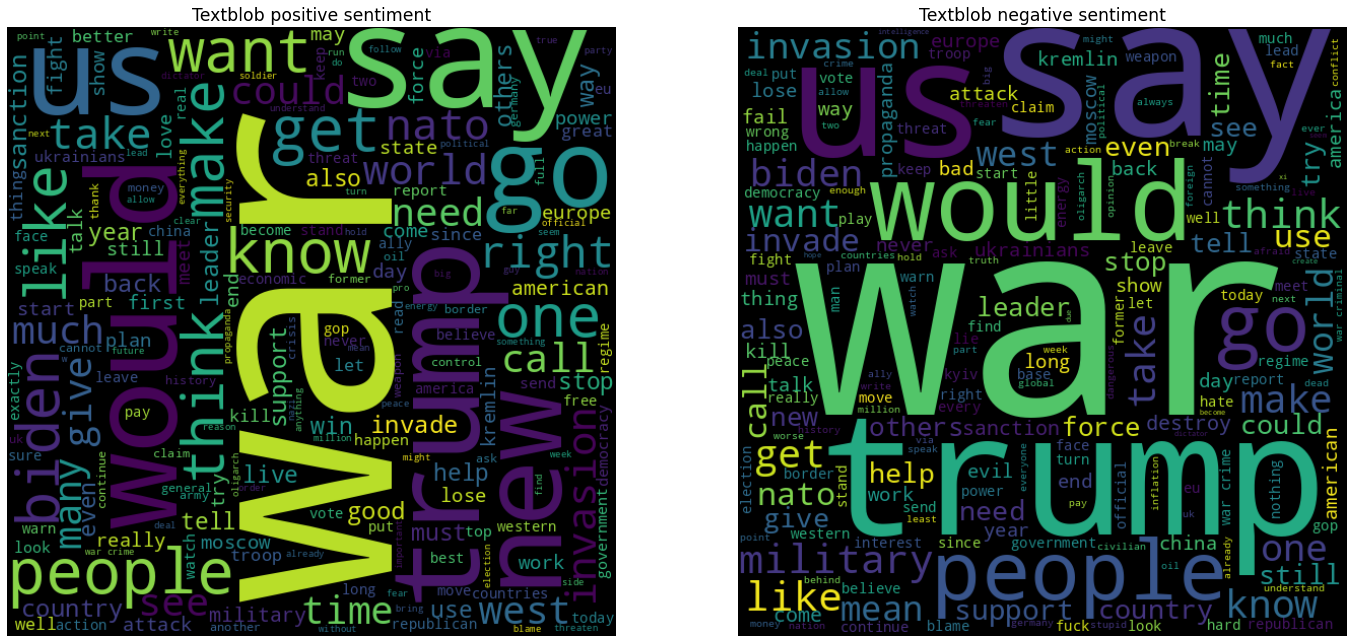

In [85]:
# Putin WordCloud (1 word) - textblob

fig, ax = plt.subplots(1, 2, figsize = (24, 24))

# Positive
wordcloud_pos = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_p[df_final_p['textblob_Sentiment'] == 'Positive'].Clean_Tweet))
ax[0].set_title('Textblob positive sentiment', fontsize = 'xx-large')
ax[0].imshow(wordcloud_pos, interpolation = 'bilinear')
ax[0].axis("off")

# Positive
wordcloud_neg = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_p[df_final_p['textblob_Sentiment'] == 'Negative'].Clean_Tweet))
ax[1].set_title('Textblob negative sentiment', fontsize = 'xx-large')
ax[1].imshow(wordcloud_neg, interpolation = 'bilinear')
ax[1].axis("off")

fig.show()

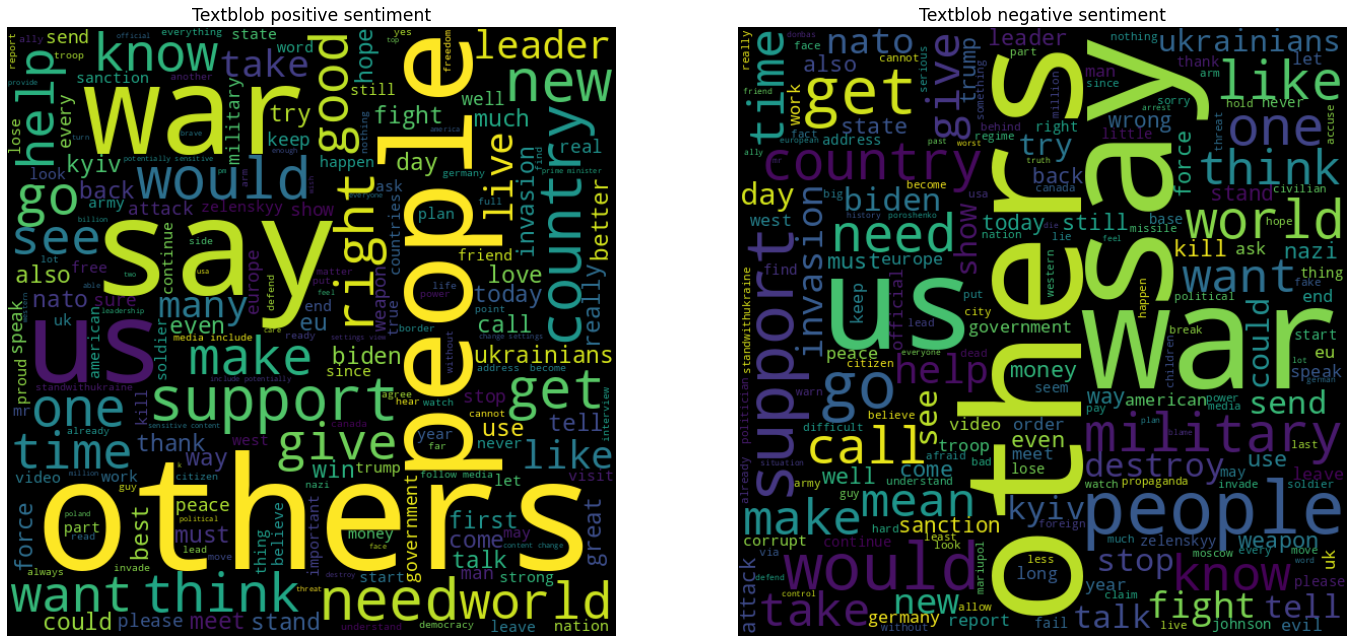

In [86]:
# Zelensky WordCloud (1 word) - textblob

fig, ax = plt.subplots(1, 2, figsize = (24, 24))

# Positive
wordcloud_pos = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_z[df_final_z['textblob_Sentiment'] == 'Positive'].Clean_Tweet))
ax[0].set_title('Textblob positive sentiment', fontsize = 'xx-large')
ax[0].imshow(wordcloud_pos, interpolation = 'bilinear')
ax[0].axis("off")

# Positive
wordcloud_neg = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_z[df_final_z['textblob_Sentiment'] == 'Negative'].Clean_Tweet))
ax[1].set_title('Textblob negative sentiment', fontsize = 'xx-large')
ax[1].imshow(wordcloud_neg, interpolation = 'bilinear')
ax[1].axis("off")

fig.show()

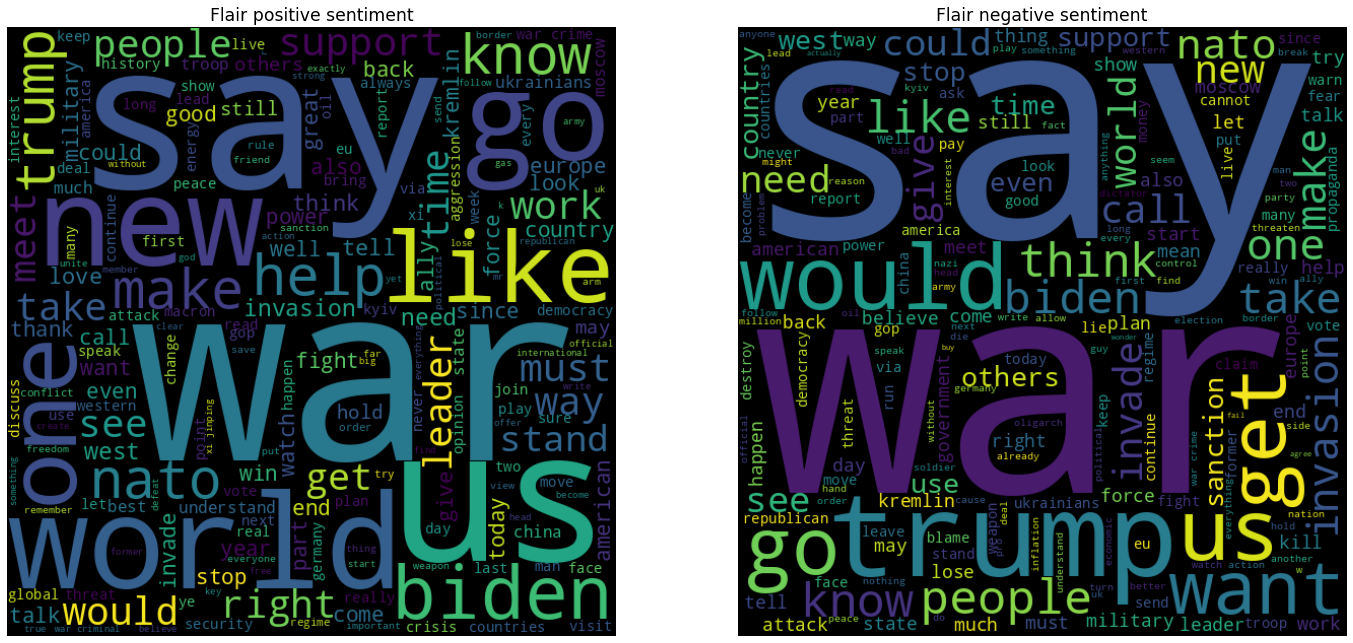

In [87]:
# Putin WordCloud (1 word) - flair

fig, ax = plt.subplots(1, 2, figsize = (24, 24))

# Positive
wordcloud_pos = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_p[df_final_p['flair_Sentiment'] == 'Positive'].Clean_Tweet))
ax[0].set_title('Flair positive sentiment', fontsize = 'xx-large')
ax[0].imshow(wordcloud_pos, interpolation = 'bilinear')
ax[0].axis("off")

# Positive
wordcloud_neg = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_p[df_final_p['flair_Sentiment'] == 'Negative'].Clean_Tweet))
ax[1].set_title('Flair negative sentiment', fontsize = 'xx-large')
ax[1].imshow(wordcloud_neg, interpolation = 'bilinear')
ax[1].axis("off")

fig.show()

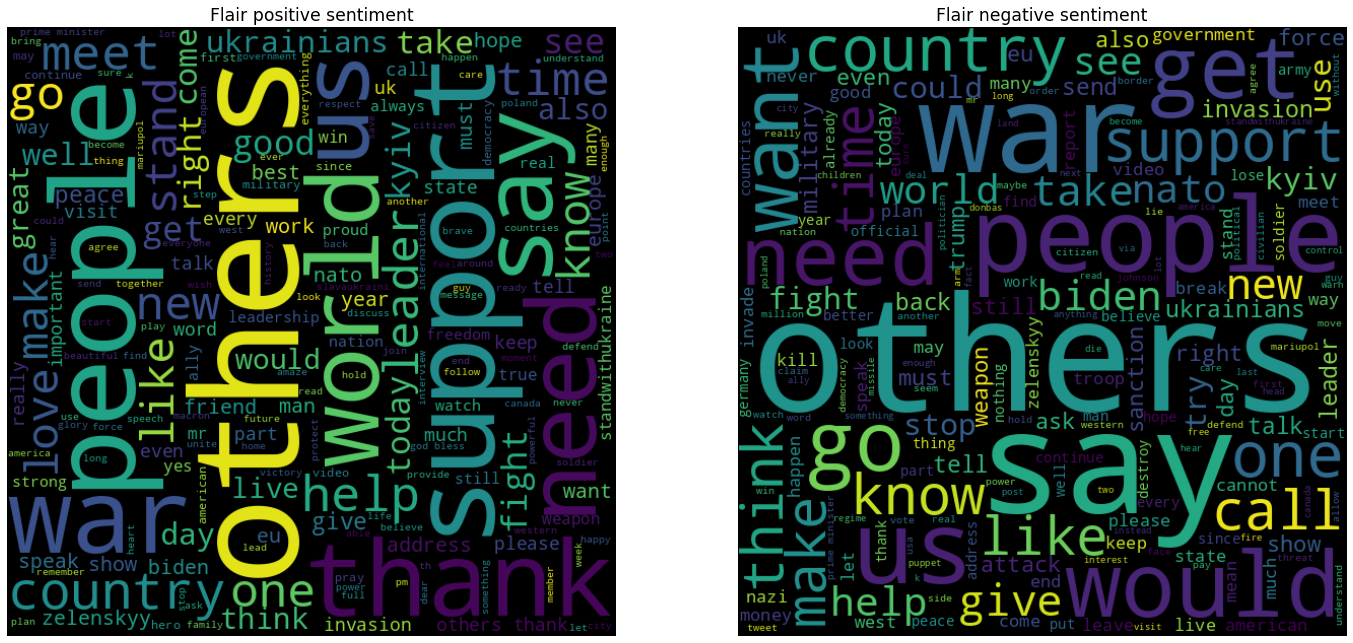

In [88]:
# Zelensky WordCloud (1 word) - flair

fig, ax = plt.subplots(1, 2, figsize = (24, 24))

# Positive
wordcloud_pos = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_z[df_final_z['flair_Sentiment'] == 'Positive'].Clean_Tweet))
ax[0].set_title('Flair positive sentiment', fontsize = 'xx-large')
ax[0].imshow(wordcloud_pos, interpolation = 'bilinear')
ax[0].axis("off")

# Positive
wordcloud_neg = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_final_z[df_final_z['flair_Sentiment'] == 'Negative'].Clean_Tweet))
ax[1].set_title('Flair negative sentiment', fontsize = 'xx-large')
ax[1].imshow(wordcloud_neg, interpolation = 'bilinear')
ax[1].axis("off")

fig.show()

### Evolution of polarity over time

In [89]:
# Different units of time are defined to group

df_final_p['day'] = df_final_p['Timestamp'].dt.dayofyear
df_final_p['month'] = df_final_p['Timestamp'].dt.month
df_final_p['week'] = df_final_p['Timestamp'].dt.isocalendar().week

df_final_z['day'] = df_final_z['Timestamp'].dt.dayofyear
df_final_z['month'] = df_final_z['Timestamp'].dt.month
df_final_z['week'] = df_final_z['Timestamp'].dt.isocalendar().week

<AxesSubplot:>

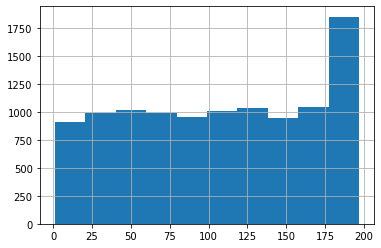

In [90]:
df_final_p['day'].hist()

<AxesSubplot:>

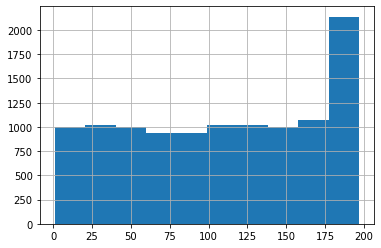

In [91]:
df_final_z['day'].hist()

In [92]:
df_final_p['month'].value_counts(sort = False)

1    1466
2    1448
3    1544
4    1521
5    1567
6    1535
7    1655
Name: month, dtype: int64

In [93]:
df_final_z['month'].value_counts(sort = False)

1    1578
2    1451
3    1479
4    1521
5    1567
6    1664
7    1891
Name: month, dtype: int64

In [94]:
df_final_p['week'].value_counts(sort = False)

28    829
27    666
6     379
23    374
20    370
7     370
24    367
15    365
8     364
13    363
25    363
4     362
17    359
18    358
9     356
12    355
26    353
11    350
14    349
21    343
22    340
19    339
16    339
10    339
5     331
3     319
2     317
1     315
52    102
Name: week, dtype: Int64

In [95]:
df_final_z['week'].value_counts(sort = False)

28    961
27    742
26    434
25    419
7     383
22    382
8     377
23    377
3     373
4     371
15    371
5     367
17    365
20    363
21    361
2     359
12    348
18    348
19    347
14    346
16    346
24    341
9     340
13    339
10    331
6     331
1     327
11    306
52     96
Name: week, dtype: Int64

In [96]:
# week 52 is out of range, check the original date
#df_final_p['Timestamp'][df_final_p['week'] == 52].unique()

In [97]:
# week 52 is out of range, check the original date
#df_final_z['Timestamp'][df_final_z['week'] == 52].unique()

In [98]:
# assign correct week
#df_final_p['week'][df_final_p['week'] == 52] = 1

In [99]:
# assign correct week
#df_final_z['week'][df_final_z['week'] == 52] = 1

In [100]:
# create a dataframe resume per week
res_week_p = df_final_p[['week', 'vader_Positive', 'vader_Negative', 'vader_Neutral', 'vader_Compound', 'textblob_Polarity', 'flair_Confidence']].groupby("week").median()#.reset_index()
res_week_z = df_final_z[['week', 'vader_Positive', 'vader_Negative', 'vader_Neutral', 'vader_Compound', 'textblob_Polarity', 'flair_Confidence']].groupby("week").median()#.reset_index()

In [101]:
res_week_p.sample(10)

vader_Positive  vader_Negative  vader_Neutral  vader_Compound  \
week                                                                  
23            0.1100          0.1670         0.6540         -0.0258   
8             0.1605          0.1545         0.6630          0.0000   
1             0.1420          0.1300         0.6910          0.0000   
7             0.1340          0.1260         0.6875          0.0000   
20            0.1190          0.1675         0.6580         -0.0258   
15            0.1360          0.1650         0.6600         -0.0258   
27            0.1355          0.1500         0.6735          0.0000   
5             0.1010          0.1300         0.7160          0.0000   
14            0.1380          0.1770         0.6530         -0.1027   
3             0.1420          0.1280         0.6940          0.0000   

      textblob_Polarity  flair_Confidence  
week                                       
23                  0.0          0.989969  
8                   0.0          0.984099  
1                   0.0          0.980794  
7                   0.0          0.986347  
20                  0.0          0.988864  
15                  0.0          0.986091  
27                  0.0          0.986798  
5                   0.0          0.987054  
14                  0.0          0.984344  
3                   0.0          0.982086

<Figure size 432x288 with 0 Axes>

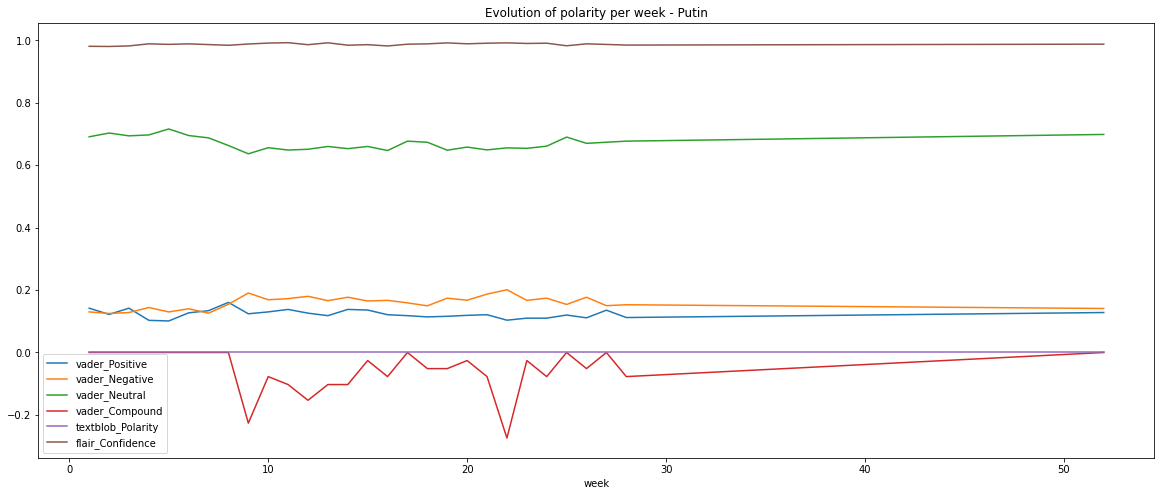

In [102]:
plt.figure()
res_week_p.plot(figsize = (20, 8))
plt.title('Evolution of polarity per week - Putin')
plt.show()

<Figure size 432x288 with 0 Axes>

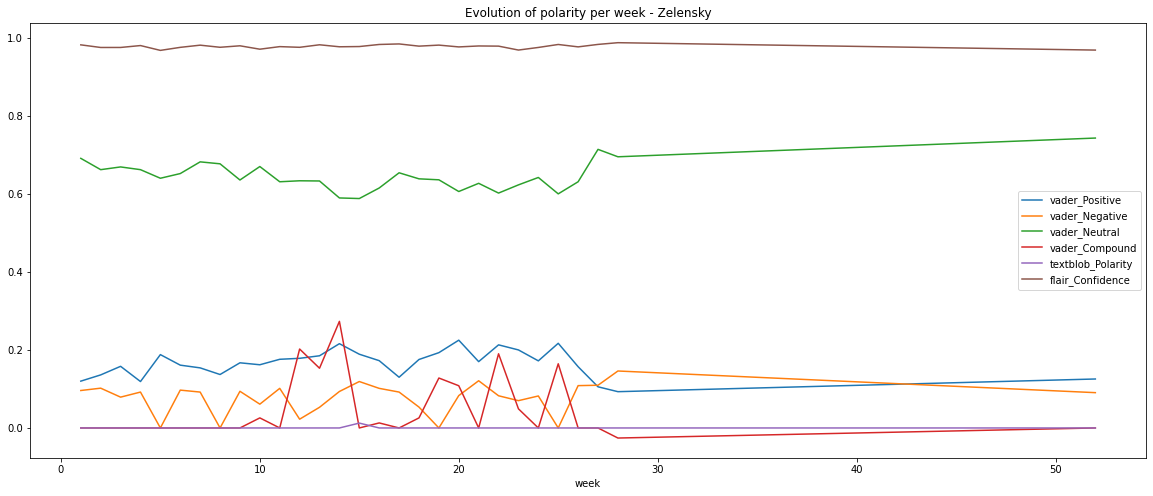

In [103]:
plt.figure()
res_week_z.plot(figsize = (20, 8))
plt.title('Evolution of polarity per week - Zelensky')
plt.show()

In [104]:
# create a dataframe resume per day
res_day_p = df_final_p[['day', 'vader_Positive', 'vader_Negative', 'vader_Neutral', 'vader_Compound', 'textblob_Polarity', 'flair_Confidence']].groupby("day").median()#.reset_index()
res_day_z = df_final_z[['day', 'vader_Positive', 'vader_Negative', 'vader_Neutral', 'vader_Compound', 'textblob_Polarity', 'flair_Confidence']].groupby("day").median()#.reset_index()

In [105]:
res_day_p.sample(10)

vader_Positive  vader_Negative  vader_Neutral  vader_Compound  \
day                                                                  
81           0.1195          0.1980         0.6605        -0.40165   
188          0.1750          0.1990         0.5960        -0.12800   
191          0.1350          0.1450         0.6350         0.00000   
106          0.1385          0.1030         0.6360        -0.01290   
23           0.1620          0.1950         0.6200         0.07720   
114          0.1675          0.0890         0.6830         0.35000   
163          0.1260          0.1630         0.6320        -0.12800   
161          0.1470          0.0790         0.6820         0.00000   
196          0.1200          0.2090         0.6520        -0.34000   
85           0.1350          0.1585         0.6570        -0.01290   

     textblob_Polarity  flair_Confidence  
day                                       
81               0.000          0.985286  
188              0.000          0.988933  
191              0.000          0.983334  
106              0.000          0.986726  
23               0.000          0.989076  
114              0.055          0.975747  
163              0.000          0.988412  
161              0.000          0.985432  
196              0.000          0.991239  
85               0.000          0.984093

<Figure size 432x288 with 0 Axes>

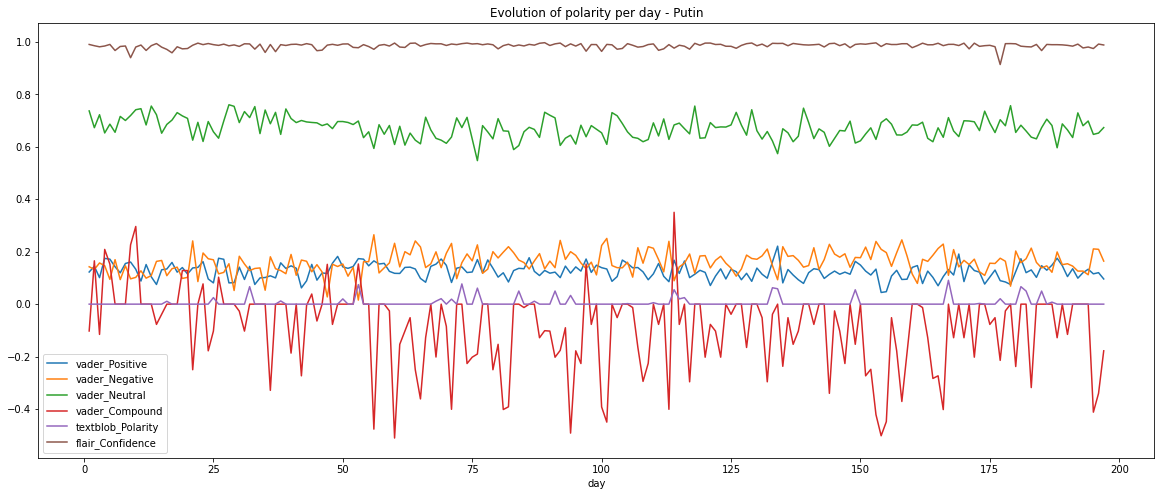

In [106]:
plt.figure()
res_day_p.plot(figsize = (20, 8))
plt.title('Evolution of polarity per day - Putin')
plt.show()

<Figure size 432x288 with 0 Axes>

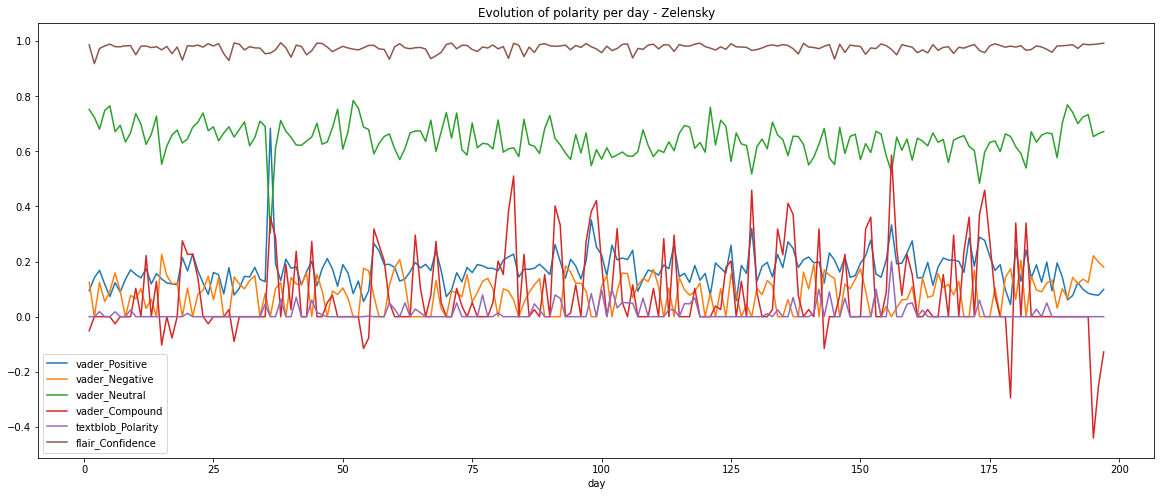

In [107]:
plt.figure()
res_day_z.plot(figsize = (20, 8))
plt.title('Evolution of polarity per day - Zelensky')
plt.show()

In [108]:
# create a dataframe resume per month
res_month_p = df_final_p[['month', 'vader_Positive', 'vader_Negative', 'vader_Neutral', 'vader_Compound', 'textblob_Polarity', 'flair_Confidence']].groupby("month").median()#.reset_index()
res_month_z = df_final_z[['month', 'vader_Positive', 'vader_Negative', 'vader_Neutral', 'vader_Compound', 'textblob_Polarity', 'flair_Confidence']].groupby("month").median()#.reset_index()

In [109]:
res_month_p

vader_Positive  vader_Negative  vader_Neutral  vader_Compound  \
month                                                                  
1              0.1285          0.1350          0.696          0.0000   
2              0.1320          0.1385          0.686          0.0000   
3              0.1280          0.1775          0.649         -0.1280   
4              0.1280          0.1670          0.655         -0.0516   
5              0.1180          0.1740          0.656         -0.0516   
6              0.1070          0.1670          0.670         -0.0772   
7              0.1200          0.1530          0.674          0.0000   

       textblob_Polarity  flair_Confidence  
month                                       
1                    0.0          0.984045  
2                    0.0          0.985883  
3                    0.0          0.990183  
4                    0.0          0.986091  
5                    0.0          0.990281  
6                    0.0          0.989862  
7                    0.0          0.985661

<Figure size 432x288 with 0 Axes>

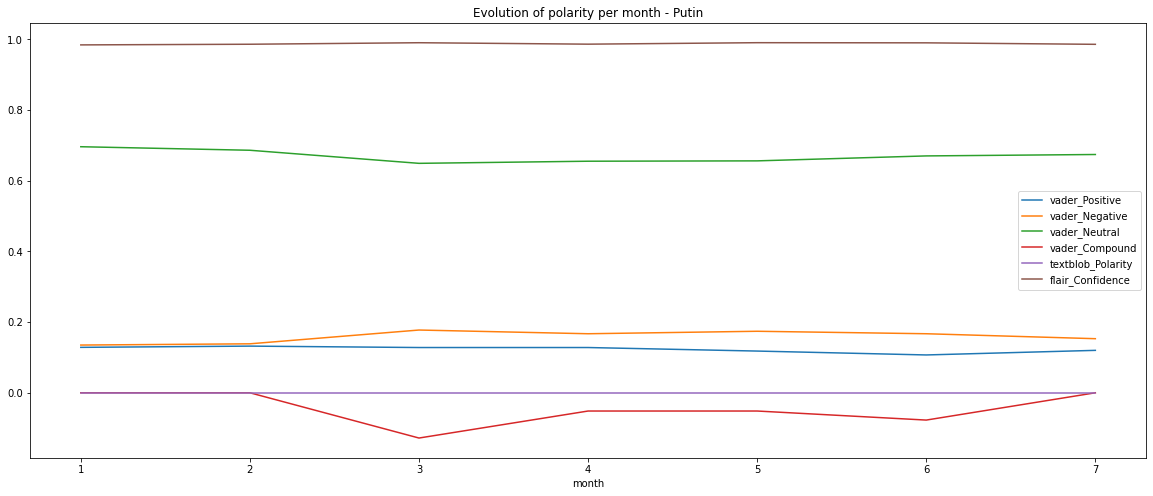

In [110]:
plt.figure()
res_month_p.plot(figsize = (20, 8))
plt.title('Evolution of polarity per month - Putin')
plt.show()

<Figure size 432x288 with 0 Axes>

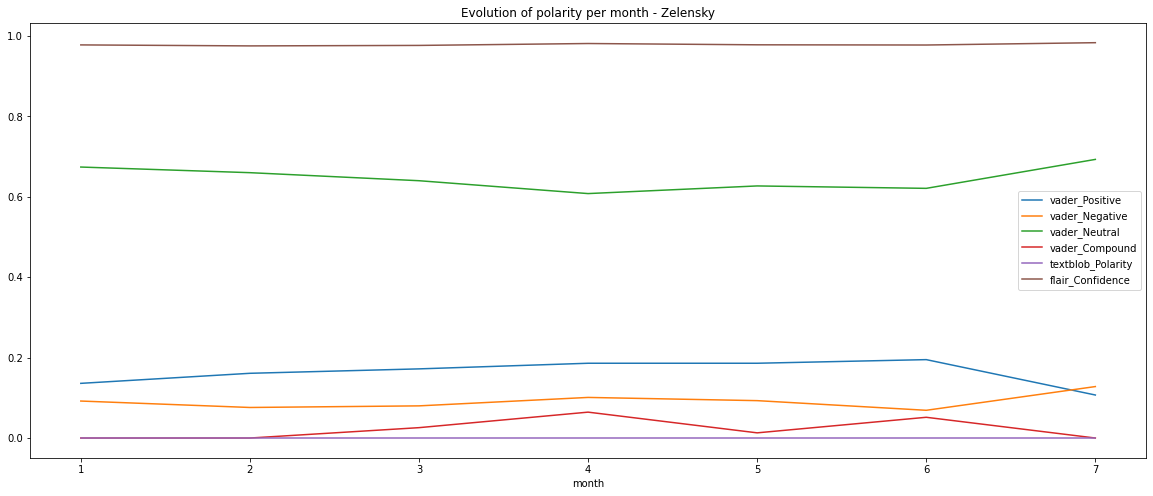

In [111]:
plt.figure()
res_month_z.plot(figsize = (20, 8))
plt.title('Evolution of polarity per month - Zelensky')
plt.show()